In [1]:
"""Allgemeine Imports"""
import numpy as np
from numpy.linalg import norm
from scipy.linalg import lu, solve_triangular, qr
import matplotlib.pyplot as plt
from GaussNewton import GaussNewton

In [2]:

def dmodel(tdata, ydata): 
    return -4*ydata

def ddmodel(tdata,ydata):
    return -4

## Programm zur Lösung eines AWPs mit der implizit Mittelpunktsregel

In [3]:
"""
def implizitMittelpunk(xend, h, y0, f, df):
    x = [0.]
    y = [y0]

    # Verfahrensfunktion G(r) = r-blabla = 0
    def G(r, xk, yk, h):
        return f(xk+0.5*h,yk+h*(0.5*r)) - r

    # Partielle Ableitung nach r der Verfahrensfunktion
    def dG(r, xk, yk, h):
        return df(xk+0.5*h,yk+h*(0.5*r))*(0.5*h) - 1

    # Newton-Verfahren für Steigung
    GaussNewton()
"""

def implizitMittelpunkt(xend, h, y0, f, df):
    x = [0.]
    y = [y0]

    # Verfahrensfunktion G(r) = r-blabla = 0
    def G(r, xk, yk):
        return f(xk+0.5*h,yk+h*(0.5*r)) - r

    # Partielle Ableitung nach r der Verfahrensfunktion
    def dG(r, xk, yk):
        return df(xk+0.5*h,yk+h*(0.5*r))*(0.5*h) - 1

    def newton(s, xk, yk, tol=1e-12, maxIter=20):
        k = 0
        delta = 10 * tol
        while np.abs(delta) > tol and k < maxIter:
            delta = G(s, xk, yk) / dG(s, xk, yk)
            s -= delta
            k += 1
        return s

    while x[-1] < xend - h / 2:
        y.append(newton(y[-1], x[-1], y[-1], tol=1e-12, maxIter=20))
        x.append(x[-1] + h)

    return np.array(x), np.array(y)

## Test anhand Modellproblem
$y'(x) = -4y(x)$ ,x element [0,2]\
$y(0) = 1$\
mit Endstelle X = 1 und N = 10 Schritten.\
Vergleichen Sie die Werte yi der numerischen Lösung mit den Werten der exakten Lösung, y(xi), i ∈ {0, 1, . . . , 10}.
- Analytische Lösung: $y(x) = exp(-4 \cdot x)$

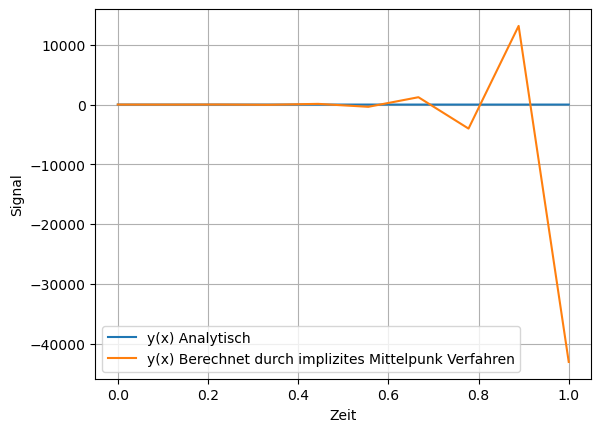

In [4]:
def model_analytisch(tdata):
    return np.exp(-4 * tdata)

tdata = np.linspace(0,1,10)
h=tdata[1]-tdata[0]
tdata_analytisch = np.linspace(0,1,100)

xdata_implizitMittelpunk, ydata_implizitMittelpunk = implizitMittelpunkt(1,h,1,dmodel,ddmodel) #def implizitMittelpunk(xend, h, y0, f, df):

#plt.plot(tdata, Aufagbe_dmodel(tdata,model_analytisch), '-', label='dy(x)/dx')
plt.plot(tdata_analytisch, model_analytisch(tdata_analytisch), '-', label='y(x) Analytisch')
plt.plot(xdata_implizitMittelpunk, ydata_implizitMittelpunk, '-', label='y(x) Berechnet durch implizites Mittelpunk Verfahren')
plt.ylabel('Signal')
plt.xlabel('Zeit')
plt.legend()
plt.grid(True)
plt.show()

## implizite Trapezregel

In [5]:
def impliziteTrapezregel(xend, h, y0, dmodel):
    x = np.array([0],dtype=float)
    y = np.array([y0],dtype=float)
    k = 0
    while x[-1] < xend-h/2:     
        r1 = dmodel(x[k], y[k] + h*(r1/2))#hier gugus muss irgenwie gleichungssystem lösen, rest solte aber stimmen
        r2 = dmodel(x[k] + h, y[k] + h*r1/2)#gugus
        y = np.append(y, y[k]+ h*((r1/2)+(r2/2)))
        x = np.append(x, x[k]+h)
        k= k+1
    return np.array(x), np.array(y)

## Test anhand Modellproblem

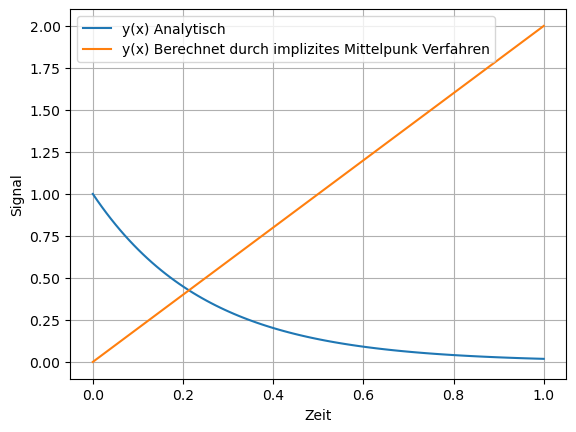

In [6]:
def Aufagbe_dmodel(tdata, model):#aus Aufgabe
    return -4*model(tdata)
    
def dmodel(tdata, ydata):#aus Aufgabe
    return -4*ydata

def model_analytisch(tdata):
    return np.exp(-4 * tdata)

tdata = np.linspace(0,1,10)
h=tdata[1]-tdata[0]
tdata_analytisch = np.linspace(0,1,100)

xdata_impliziteTrapezregel, ydata_impliziteTrapezregel = tdata, 2*tdata#impliziteTrapezregel(1,h,1,dmodel) #def implizitMittelpunk(xend, h, y0, dmodel):

#plt.plot(tdata, Aufagbe_dmodel(tdata,model_analytisch), '-', label='dy(x)/dx')
plt.plot(tdata_analytisch, model_analytisch(tdata_analytisch), '-', label='y(x) Analytisch')
plt.plot(xdata_impliziteTrapezregel, ydata_impliziteTrapezregel, '-', label='y(x) Berechnet durch implizites Mittelpunk Verfahren')
plt.ylabel('Signal')
plt.xlabel('Zeit')
plt.legend()
plt.grid(True)
plt.show()

## Anwendung auf neues Modellproblem
$y'(x) + x^2 / y(x) = 0$\
$y(0) = -4$\
Berechnen Sie für X = 2 und N = 3^j , j ∈ {1, 2, 3, 4, 5, 6, 7, 8}, jeweils die absoluten Fehler an der Endstelle(y(2) = −4 * √︁(2/3)).
- Analytische Lösung: $y = - sqr(2/3) * sqr(24-x^3)$

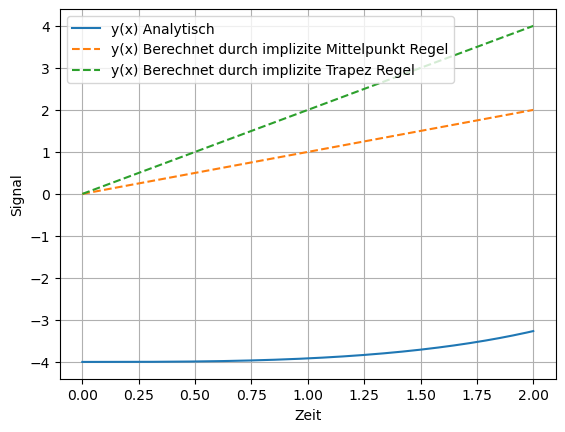

In [7]:
def Aufgabe_dmodel(tdata,model):
    return - (tdata**2/model(tdata))

def dmodel(tdata,ydata):
    return - (tdata**2/ydata)

def model_analytisch(tdata):
    return -np.sqrt(2/3) * np.sqrt(24 - tdata**3)

def ddmodel(tdata, ydata):#wäre bei implixit methode df
    return ((((- (tdata**2/ydata)) * tdata**2)/(ydata**2)) - ((2*tdata)/ydata))
                   
tdata = np.linspace(0,2,10)
h=tdata[1]-tdata[0]
tdata_analytisch = np.linspace(0,2,200)

xdata_implizitMittelpunk, ydata_implizitMittelpunk = tdata,  1*tdata#implizitMittelpunk(1,h,1,dmodel) #def implizitMittelpunk(xend, h, y0, dmodel):
xdata_impliziteTrapezregel, ydata_impliziteTrapezregel = tdata, 2*tdata#impliziteTrapezregel(1,h,1,dmodel) #def implizitMittelpunk(xend, h, y0, dmodel):

#plt.plot(tdata, Aufgabe_dmodel(tdata,model_analytisch), '-', label='dy(x)/dx')
plt.plot(tdata_analytisch, model_analytisch(tdata_analytisch), '-', label='y(x) Analytisch')
plt.plot(xdata_implizitMittelpunk, ydata_implizitMittelpunk, '--', label='y(x) Berechnet durch implizite Mittelpunkt Regel')
plt.plot(xdata_impliziteTrapezregel, ydata_impliziteTrapezregel, '--', label='y(x) Berechnet durch implizite Trapez Regel')
plt.ylabel('Signal')
plt.xlabel('Zeit')
plt.legend()
plt.grid(True)
plt.show()

## Fehlerberechnung der verschiedenen Verfahren

C:\Users\Samuel Maissen\AppData\Local\Temp\ipykernel_21460\4029095750.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Figure size 640x480 with 0 Axes>

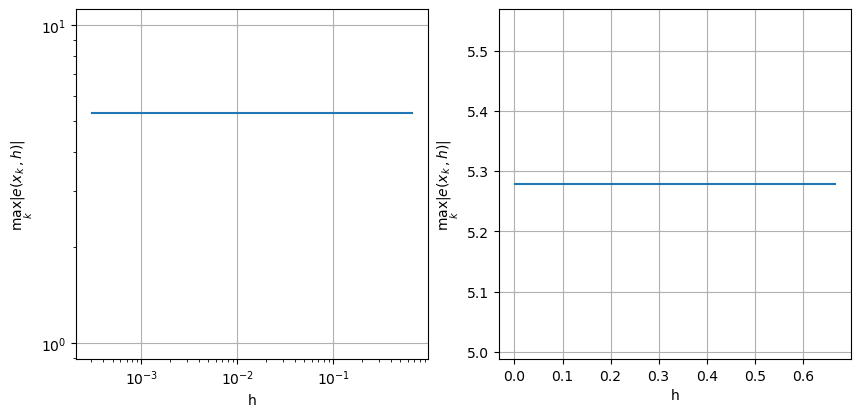

C:\Users\Samuel Maissen\AppData\Local\Temp\ipykernel_21460\4029095750.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Figure size 640x480 with 0 Axes>

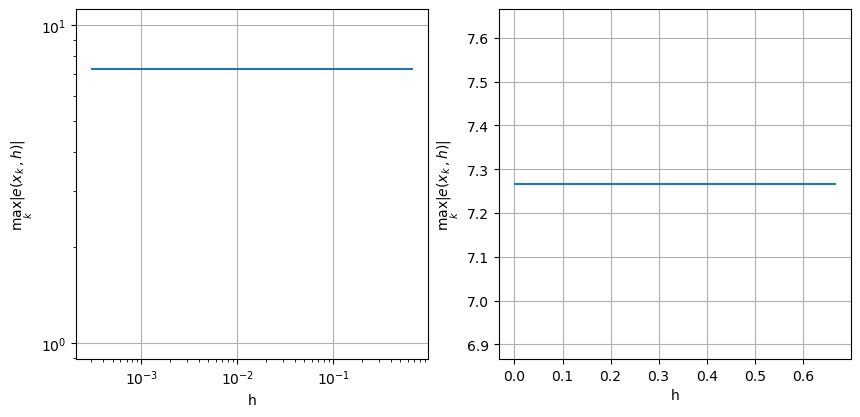

In [8]:
#Achtung dieser Code rechnet vergleichsweise lange -> geduld!
n = 3**np.linspace(1,8,8)
hs = 2/n
err_implizitMittelpunk = []
err_impliziteTrapezregel = []
for h in hs:
    xdata_implizitMittelpunk, ydata_implizitMittelpunk = tdata, 1*tdata#implizitMittelpunk(1,h,1,dmodel) #def implizitMittelpunk(xend, h, y0, dmodel):
    xdata_impliziteTrapezregel, ydata_impliziteTrapezregel = tdata, 2*tdata#impliziteTrapezregel(1,h,1,dmodel) #def implizitMittelpunk(xend, h, y0, dmodel):

    err_implizitMittelpunk.append(np.linalg.norm(ydata_implizitMittelpunk-model_analytisch(xdata_implizitMittelpunk),np.inf))
    err_impliziteTrapezregel.append(np.linalg.norm(ydata_impliziteTrapezregel-model_analytisch(xdata_impliziteTrapezregel),np.inf))
        
plt.figure(1)
plt.figure(figsize=(10,10))
plt.title('implizite Mittelpunk Regel')
plt.subplot(221)
plt.loglog(hs,err_implizitMittelpunk,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.subplot(222)
plt.plot(hs,err_implizitMittelpunk,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()

plt.figure(2)
plt.figure(figsize=(10,10))
plt.title('implizite Trapezregel')
plt.subplot(221)
plt.loglog(hs,err_impliziteTrapezregel,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.subplot(222)
plt.plot(hs,err_impliziteTrapezregel,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()